# Problem Statement and Objectives


Our goal is to predict flight delays and, in the future, expand the program to
calculate the most probable delay values. Throughout our work, we will utilize a
dataset containing flight information from 2017 to 2018, provided by the Bureau
of Transportation Statistics in conjunction with the Weather API. The primary
focus is to examine the correlation between weather conditions and flight delays.
Our approach centers around machine learning techniques, and we will em-
ploy statistical learning models using Python. The aim is to forecast flight delays
and in future provide precise values of delays. We believe that our project can
contribute to improving the travel experience by offering more accurate infor-
mation about potential flight delays.

# Data Colection


## Importing Preprocessed Data 


We obtained flight data and all related information such as airlines, distances, scheduled arrival time, etc. from kaggle.com.

In [ ]:
def get_flights_data():
    DATASET_URL = "https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018"
    od.download(DATASET_URL)

We decided to get weather information and combine it with previous data. It turned out to be more difficult than we thought, due to the limited number of inquiries, the time it takes to handle such an amount of data and the resources of our computers. Thanks to https://www.visualcrossing.com we received unlimited access to their weather API. We decided to deal with the remaining limitations in the following way. All details of the data collection process can be found in the <...> file.

Here we have a method that allows us to optimize the number of queries and therefore the time:

In [6]:
# Function to create a grid for mapping data based on DataFrame
def gridmaker(baseyear, df):
    print("Creating grid")
    grid = [[] for _ in range(numofdaysinyear)]

    for index, row in df.iterrows():
        year = int(row.iloc[8])
        month = int(row.iloc[9])
        day = int(row.iloc[10])
        nrofday = daycode(year, month, day, baseyear)

        deptime = int(row.iloc[3])

        if not grid[nrofday]:
            grid[nrofday].append((year, month, day))

        grid[nrofday].append((index, deptime))

    print("Grid created")
    return grid


Weather data that we decided to obtain:

In [ ]:
# Weather data we download (the moon phase is downloaded separately)
important_data = {
                    'MOONPHASE': moon,
                    'CONDITIONS': desired_hour_data.get('conditions', None),
                    'CLOUDCOVER': desired_hour_data.get('cloudcover', None),
                    'VISIBILITY': desired_hour_data.get('visibility', None),
                    'PRESSURE': desired_hour_data.get('pressure', None),
                    'WINDDIR': desired_hour_data.get('winddir', None),
                    'WINDSPEED': desired_hour_data.get('windspeed', None),
                    'WINDGUST': desired_hour_data.get('windgust', None),
                    'SNOWDEPTH': desired_hour_data.get('snowdepth', None),
                    'SNOW': desired_hour_data.get('snow', None),
                    'PRECIPPROB': desired_hour_data.get('precipprob', None),
                    'PRECIP': desired_hour_data.get('precip', None),
                    'DEW': desired_hour_data.get('dew', None),
                    'HUMIDITY': desired_hour_data.get('humidity', None),
                    'TEMP': desired_hour_data.get('temp', None),
                    'FEELSLIKE': desired_hour_data.get('feelslike', None)
                }

Weather data are coleced for each orginin:

In [ ]:
# Function to start the data processing for each origin
def starttreat(origin_id, year):
    filename = f'originsplited_2017\df_2017_{i}.csv'

    df = pd.read_csv(filename, dtype={'CONDITIONS': str})
    df = df.set_index('ID')

    get_weather_data(gridmaker(year, df), year, origin_id, filename, df)#pobranie_danych

In this way, we have created weather data files for each origin combined with data for the corresponding flights (computers resources reasons). By collecting everything into one file we get our dataset.

The data is mostly mapped. The mappings are stored in the mappings.json.

# Data Discovery

Info about columns:

In [ ]:
df = pd.read_csv('data_cale.csv') #zmienic nazwe?

In [ ]:
df.head(10)

In [12]:
print(f"There ara {df.shape[0]} rows and {df.shape[1]} columns.")

There ara 12651227 rows and 38 columns.


In [5]:
df.columns.values

array(['ID', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'CRS_ARR_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'FL_YEAR', 'FL_MONTH', 'FL_DAY', 'ARR_DELAY', 'DELAY', 'MOONPHASE',
       'CONDITIONS', 'CLOUDCOVER', 'VISIBILITY', 'PRESSURE', 'WINDDIR',
       'WINDSPEED', 'WINDGUST', 'SNOWDEPTH', 'SNOW', 'PRECIPPROB',
       'PRECIP', 'DEW', 'HUMIDITY', 'TEMP', 'FEELSLIKE', 'ice',
       'freezingrain', 'snow', 'rain', 'id', 'datatype', 'day_of_week',
       'month'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12651227 entries, 0 to 12651226
Data columns (total 38 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ID                float64       
 1   OP_CARRIER        category      
 2   ORIGIN            category      
 3   DEST              int64         
 4   CRS_DEP_TIME      int64         
 5   CRS_ARR_TIME      int64         
 6   ARR_TIME          int64         
 7   CRS_ELAPSED_TIME  int64         
 8   DISTANCE          int64         
 9   FL_YEAR           uint32        
 10  FL_MONTH          uint16        
 11  FL_DAY            uint16        
 12  ARR_DELAY         int64         
 13  DELAY             uint16        
 14  MOONPHASE         float64       
 15  CONDITIONS        object        
 16  CLOUDCOVER        float64       
 17  VISIBILITY        float64       
 18  PRESSURE          float64       
 19  WINDDIR           float64       
 20  WINDSPEED         float64       
 21  WINDGU

In [8]:
def check_nans(df):
  n = len(df.iloc[:, 0])
  for col in df.columns.values:
    nans = df[col].isna().sum()
    print(f"Col name: {col:<21} nans: {nans:<10}   {round((nans / n) * 100,2)} %")
  print(f"\nThere are {n} rows")

In [9]:
check_nans(df)

Col name: id                    nans: 2381348      25.19 %
Col name: OP_CARRIER            nans: 0            0.0 %
Col name: ORIGIN                nans: 0            0.0 %
Col name: DEST                  nans: 0            0.0 %
Col name: CRS_DEP_TIME          nans: 0            0.0 %
Col name: CRS_ARR_TIME          nans: 0            0.0 %
Col name: ARR_TIME              nans: 0            0.0 %
Col name: CRS_ELAPSED_TIME      nans: 0            0.0 %
Col name: DISTANCE              nans: 0            0.0 %
Col name: FL_YEAR               nans: 0            0.0 %
Col name: FL_MONTH              nans: 0            0.0 %
Col name: FL_DAY                nans: 0            0.0 %
Col name: ARR_DELAY             nans: 0            0.0 %
Col name: DELAY                 nans: 0            0.0 %
Col name: MOONPHASE             nans: 229          0.0 %
Col name: CONDITIONS            nans: 229          0.0 %
Col name: CLOUDCOVER            nans: 229          0.0 %
Col name: VISIBILITY         

We removed columns with significant amounts of NANs. We also simply deleted the rows with missing singletons.

Maybe we should remove windgust? So many NaNs, probably no colleration, ID?

In [ ]:
df = df.drop(columns=['ID', 'WINDGUST', 'id']) #mozeliwe ze sa jeszcze inne kolumny jak unnamed: 0, jak ocs to dodac do usuniecia

In [ ]:
check_nans(df)

In [ ]:
df = df.dropna()

In [ ]:
check_nans(df)

# Exploratory Data Analysis and Visualization

Since the graph drawing functions are quite extensive, they are all located in the <..> module.

Since the graph drawing functions are quite extensive, they are all located in the <..> module.

In [ ]:
ten kołowy z opoznione do nieopóźnione () !!!

In [ ]:
airlines_delay_analysis(df)

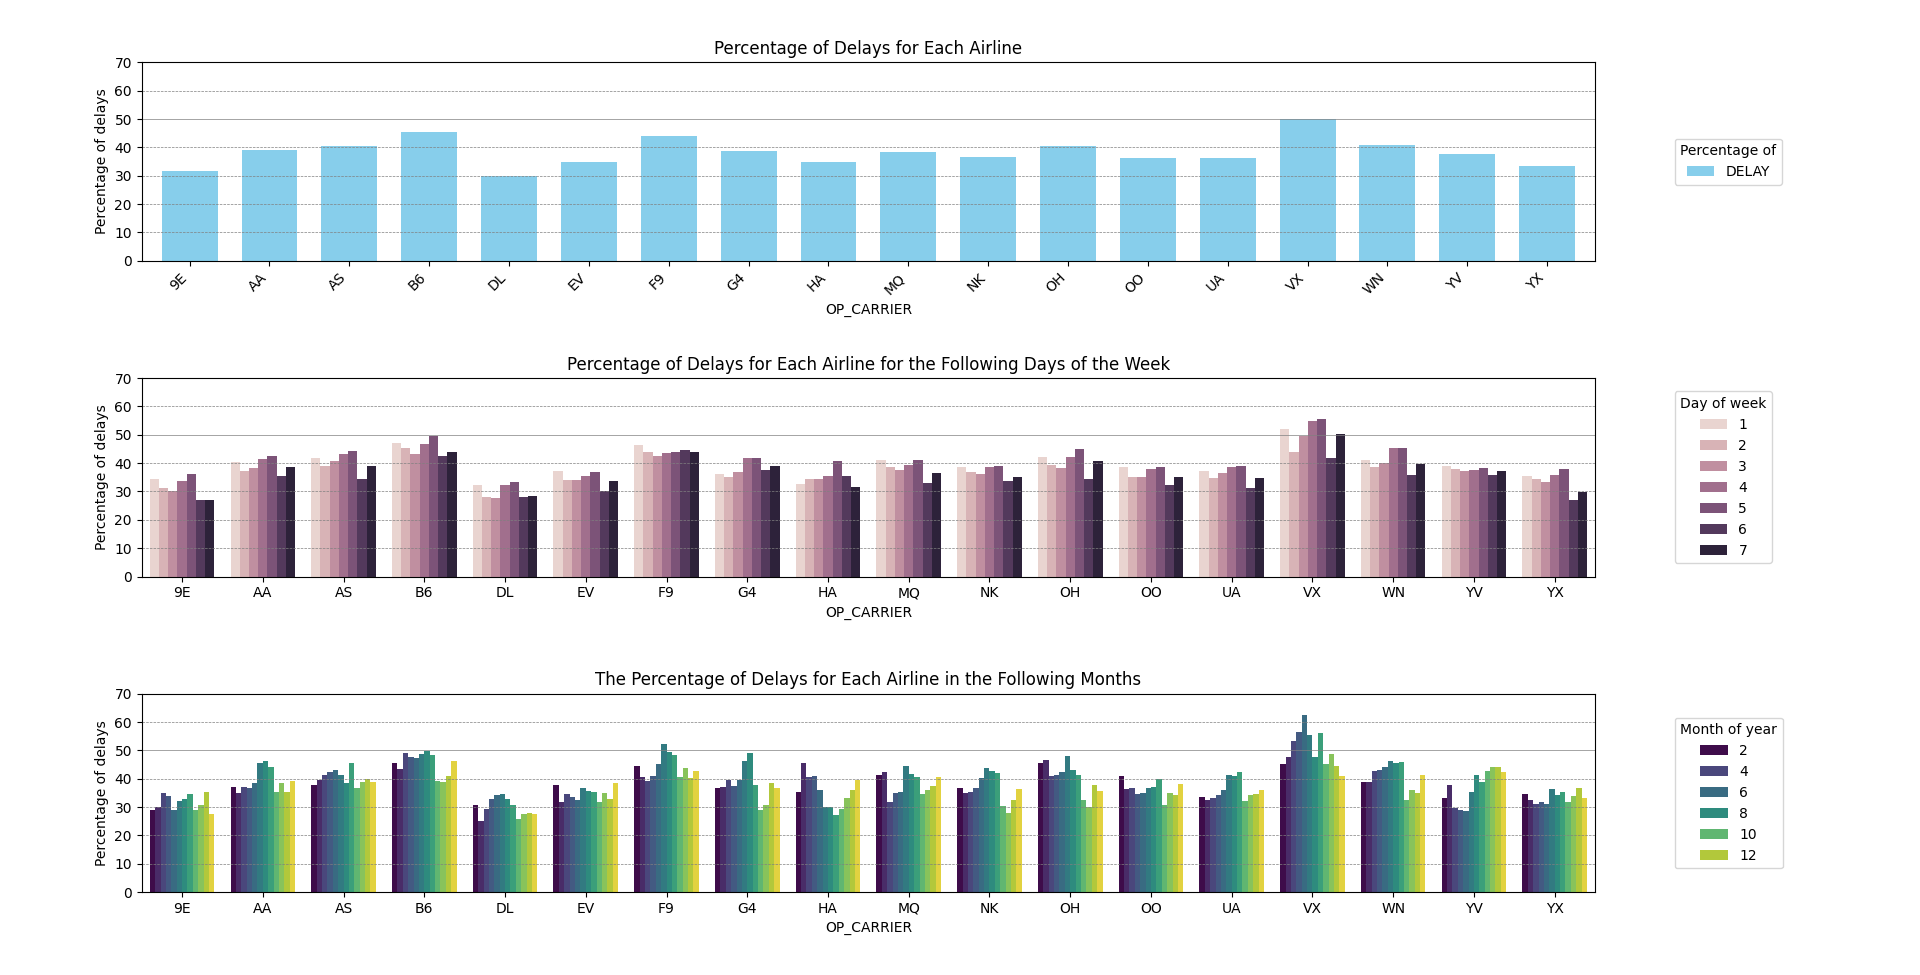

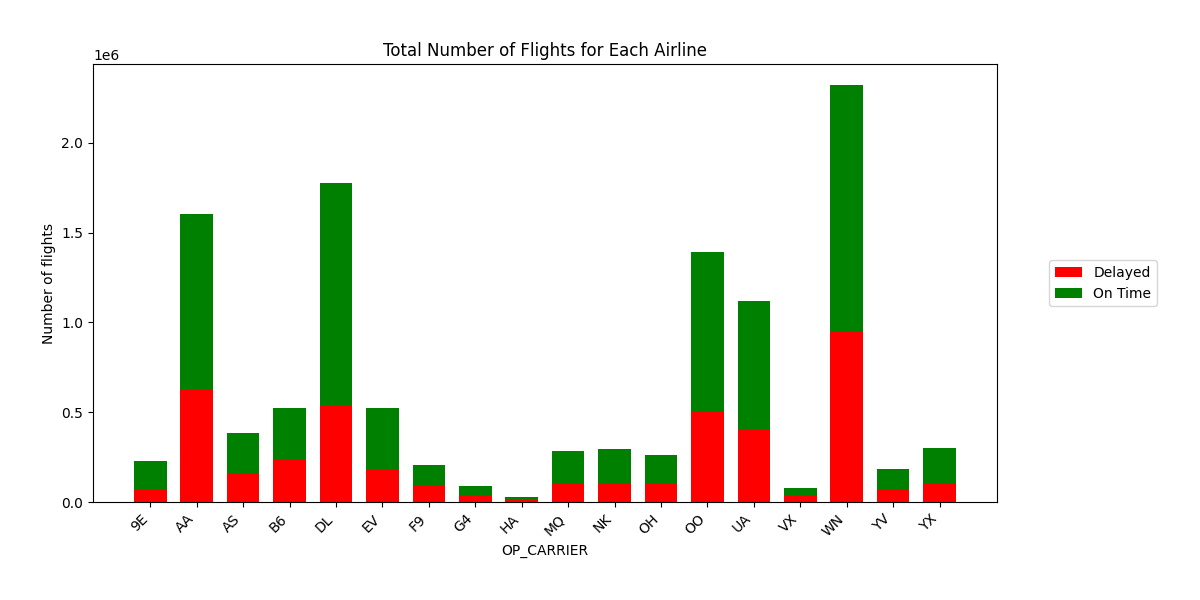

In [ ]:
airlines_distance_analysis(df)

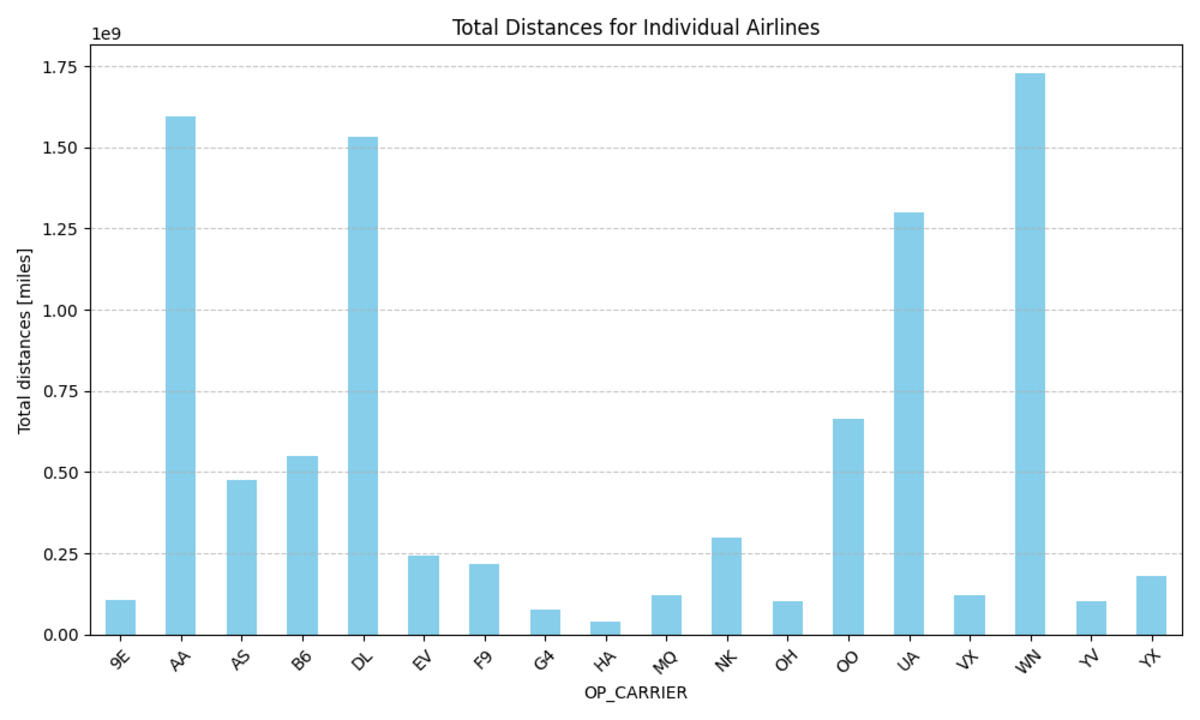

In [ ]:
monthly_delay_analysis(df)

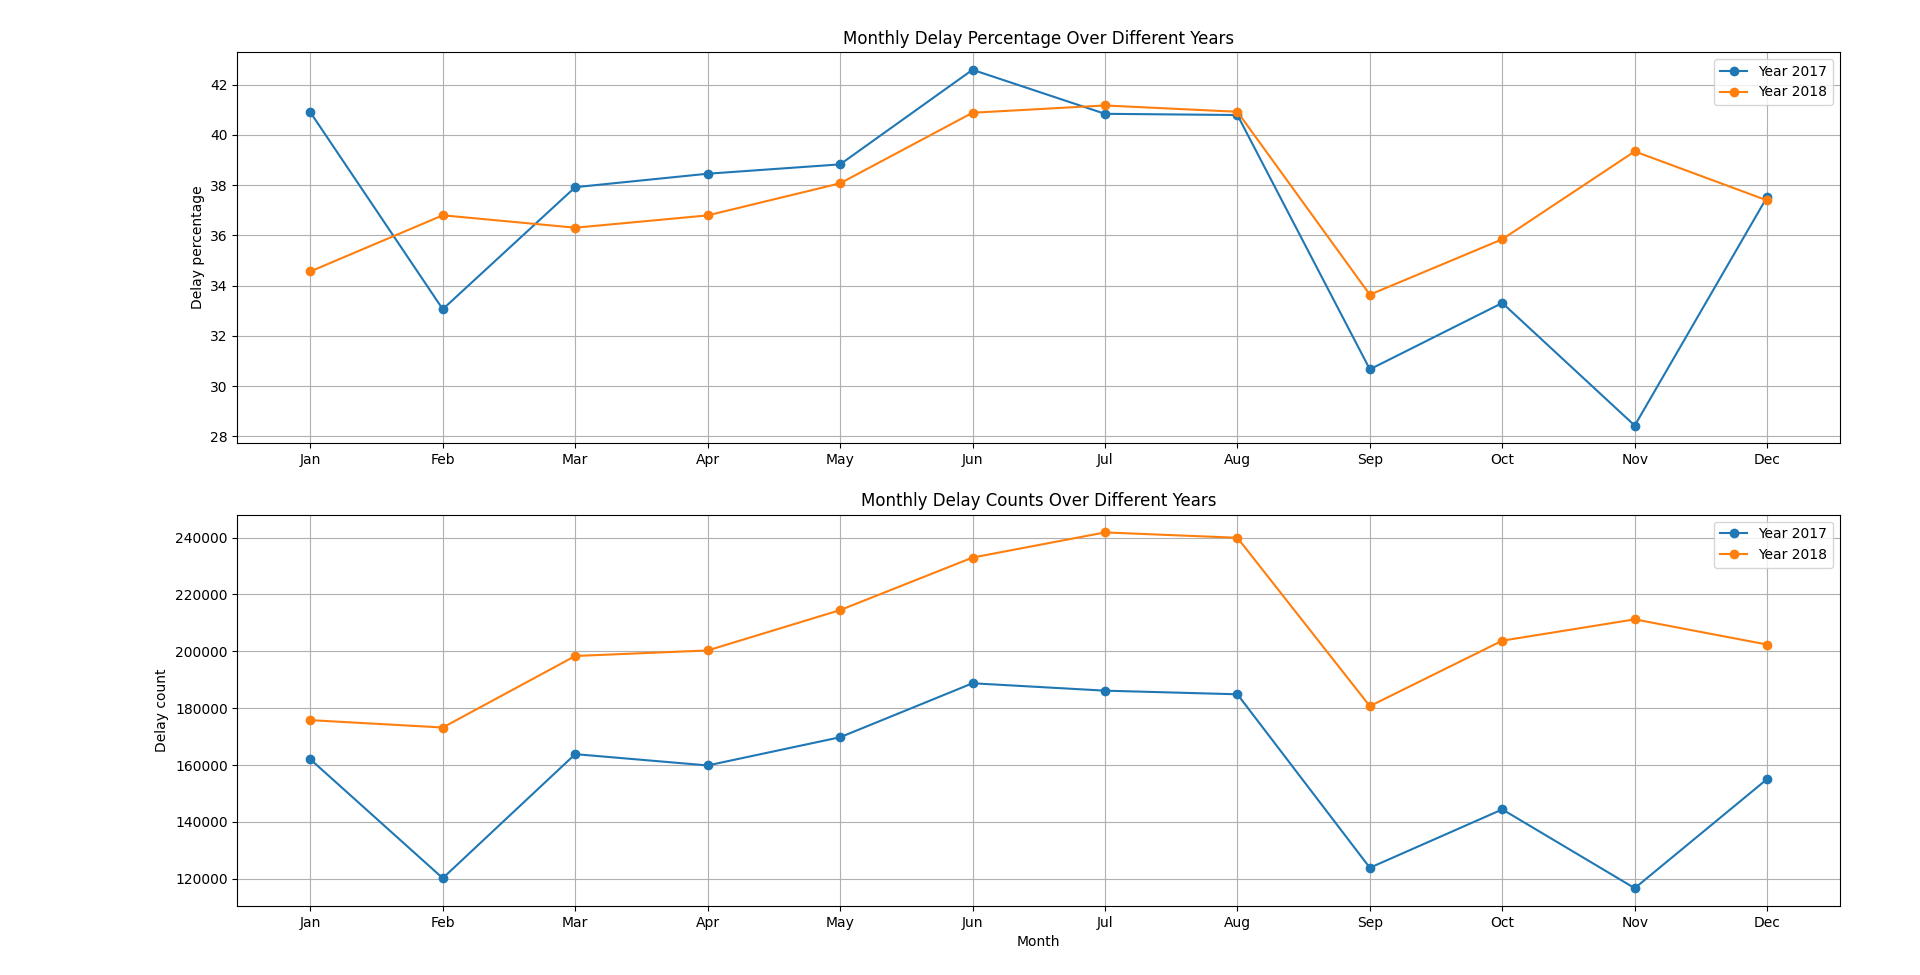

In [ ]:
hours_delay_analysis()

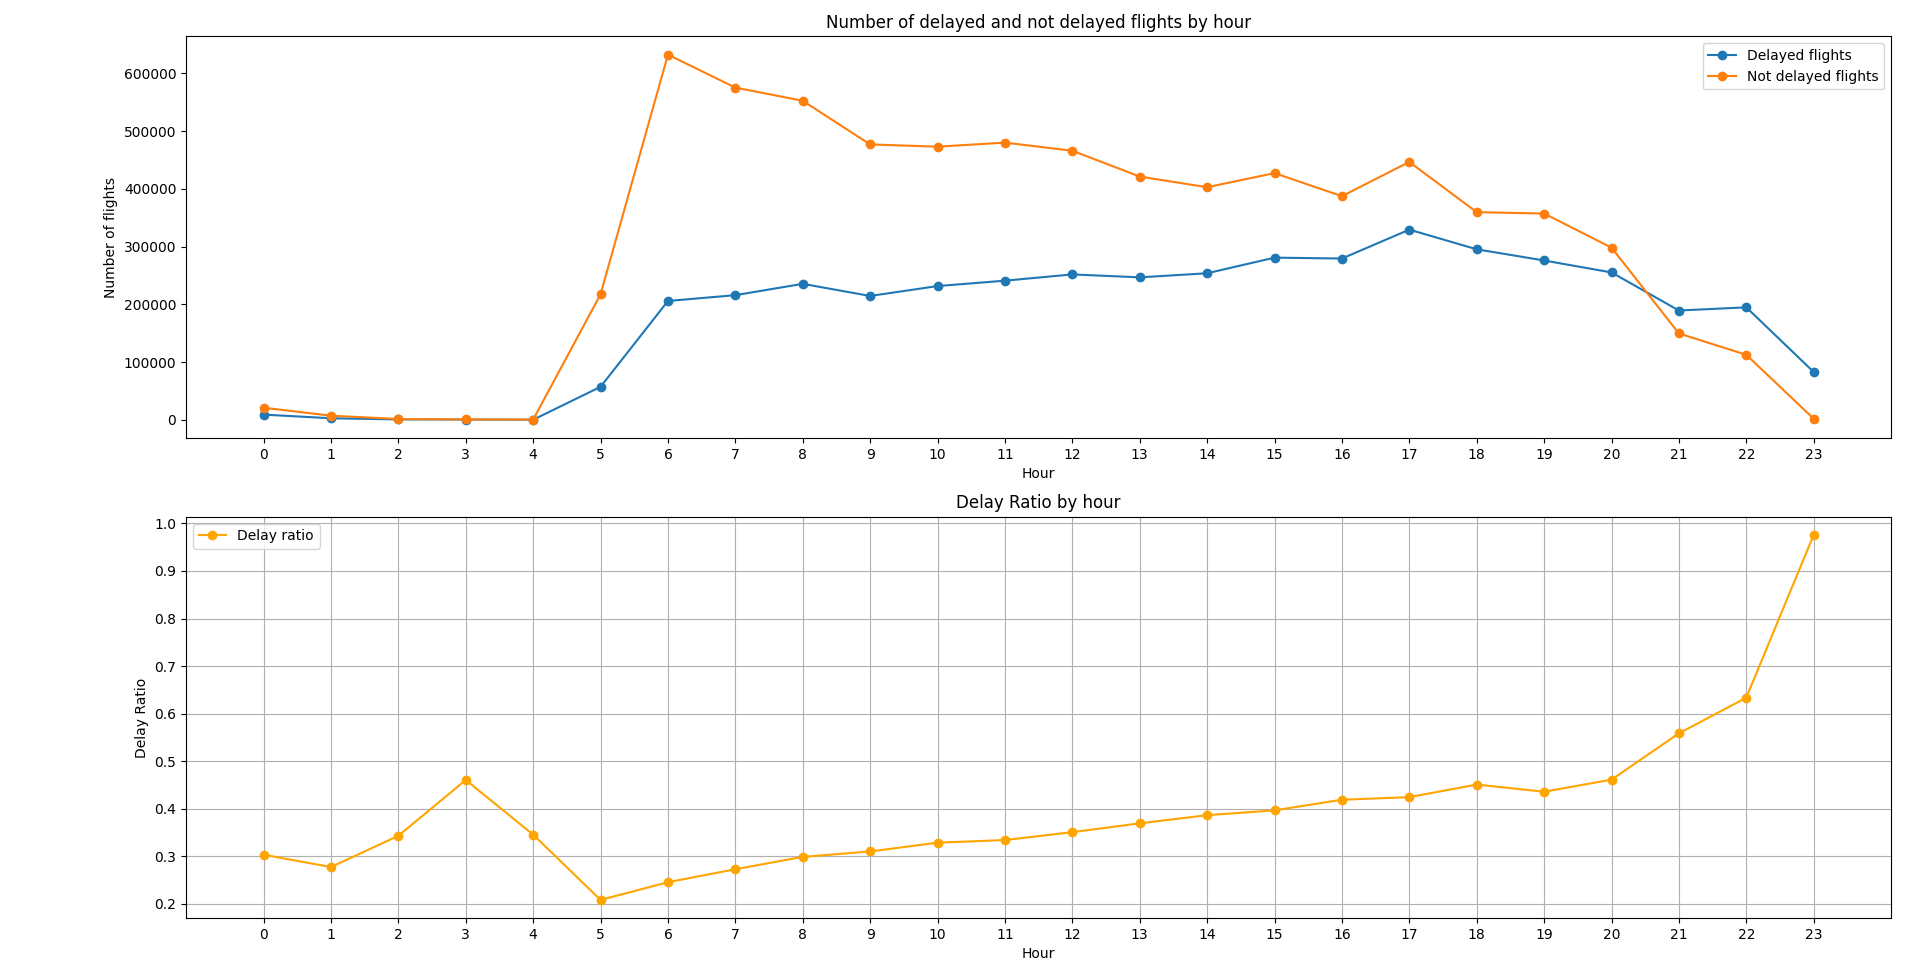

# Data Preprocessing

## Handling Text and Categorical Attributes

We used the following function to lock the remaining columns:

In [1]:
def make_mapping(col_name):
  ar = np.array(dataset[col_name])
  unique = np.unique(ar)
  d = {}
  for idx in range(len(unique)):
    d[unique[idx]] = idx
  dataset[col_name] = dataset[col_name].map(d).astype(np.uint16)
  return d

All mappings are in the <...> file.

## Separating Train and Test Sets

We divided the set into a training part with a 1 to 1 ratio of delayed to undelayed flights and a test part in which this ratio is the same as in the entire set.
Our labels are the values 0 and 1 from the DELAY column.

In [2]:
def train_test_sets_preparation(df):

	# Splitting into training and testing sets while maintaining class proportions
	X_train, X_test, y_train, y_test = train_test_split(df.drop('DELAY', axis=1), df['DELAY'], test_size=0.2, stratify=df['DELAY'], random_state=42)

	# Splitting the training set again into classes 0 and 1
	X_train_0 = X_train[y_train == 0]
	X_train_1 = X_train[y_train == 1]
	y_train_0 = y_train[y_train == 0]
	y_train_1 = y_train[y_train == 1]

	n = min(len(X_train_0), len(X_train_1))

	# Combining subsets of class 0 and 1 in a 1:1 ratio
	X_train_balanced = pd.concat([X_train_0.sample(n=n, random_state=42), X_train_1.sample(n=n, random_state=42)])
	y_train_balanced = pd.concat([y_train_0.sample(n=n, random_state=42), y_train_1.sample(n=n, random_state=42)])

	return X_train_balanced, X_test, y_train_balanced, y_test

## Feature Scaling

We are scaling train and test sets leaving the labels unchanged.

In [ ]:
def normalization(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Machine Learning Proccess

## Batch Learning

Models:

In [2]:
def SVM(X_train, X_test, y_train, y_test):
    # Initializing the SVM classifier
    clf = SVC()

    # Training the classifier on the training data
    clf.fit(X_train, y_train)

    # Predicting labels for the test data
    y_pred = clf.predict(X_test)

    # Evaluating the classifier's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Classification Accuracy: {accuracy:.2f}')

    # Displaying the full classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

In [3]:
def LogisticREG(X_train, X_test, y_train, y_test):
	# Initializing the logistic regression model
	model = LogisticRegression()

	# Different regression parameters
	param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']}

	# Grid search for finding the best parameters
	grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
	grid_search.fit(X_train, y_train)

	# Extracting the best parameters and best estimator from grid search
	best_params = grid_search.best_params_
	best_model = grid_search.best_estimator_

	# Predicting labels for the test set using the best model
	y_pred = best_model.predict(X_test)

	# Calculating the accuracy of the model
	accuracy = accuracy_score(y_test, y_pred)

	# Printing the best parameters and accuracy
	print("LR best parameters:", best_params)
	print("Accuracy:", accuracy)

In [4]:
def DecisionTree(X_train, X_test, y_train, y_test, max_depth=4):
    # Initializing the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion='gini')

    # Training the classifier on the training data
    clf.fit(X_train, y_train)

    # Predicting labels for the test data
    y_pred = clf.predict(X_test)

    # Evaluating the classifier's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Classification Accuracy: {accuracy:.2f}')

    # Displaying the full classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [ ]:
def ADA(X_train, X_test, y_train, y_test):
    clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

## Online Learning

Due to hardware limitations, we decided to try an online approach.

Using the following function you can replace the training and test sets into several smaller sets with the number of rows equal to max_rows_per_chunk:

In [ ]:
def split_csv(input_csv, output_prefix, max_rows_per_chunk):
	df = pd.read_csv(input_csv, chunksize=max_rows_per_chunk)
	for i, chunk in enumerate(df):
		chunk.to_csv(f"{output_prefix}_{i}.csv", index=False)


This function allows you to load the appropriate piece of data together with the corresponding labels:

In [ ]:
# Function to load data from CSVs files
def load_data(set_type, indices):
	for index in indices:
		X = pd.read_csv(f'X_{set_type}_{index}.csv')
		y = pd.read_csv(f'y_{set_type}.csv')
		start = index * 1_000_000
		end = start + len(X)
		y = y.iloc[start:end]
		yield X, y.values.ravel()

Models:

In [3]:
def sgdclassifier():
    model = SGDClassifier()
    
    # Iteratively train the model on divided datasets
    for X_train, y_train in load_data('train', range(0, 7)):
    	print(f"{X_train.shape}    {y_train.shape}")
    	model.partial_fit(X_train, y_train, classes=[0,1])
    
    # Evaluate the model on entire test data
    test_accuracy = 0
    test_samples = 0
    for X_test, y_test in load_data('test', range(0, 3)):
    	print(f"{X_test.shape}    {y_test.shape}")
    	test_accuracy += model.score(X_test, y_test) * len(X_test)
    	test_samples += len(X_test)
    
    print("Overall accuracy on test data:")
    print(test_accuracy / test_samples)

In [5]:
def mlpclassifier():
    model = MLPClassifier()
    
    # Iteratively train the model on divided datasets
    for X_train, y_train in load_data('train', range(0, 7)):
        model.partial_fit(X_train, y_train, classes=[0,1])
    
    # Evaluate the model on entire test data
    test_accuracy = 0
    test_samples = 0
    for X_test, y_test in load_data('test', range(0, 3)):
        accuracy = model.score(X_test, y_test)
        test_accuracy += accuracy * len(X_test)
        test_samples += len(X_test)
    
    print("Overall accuracy on test data:")
    print(test_accuracy / test_samples)